In [5]:
import numpy as np

class KMeansClustering:
    def __init__(self, K, max_iters=100, tol=1e-4):
        self.K = K
        self.max_iters = max_iters
        self.tol = tol  # Tolerance for convergence
        self.centroids = None
        self.labels = None

    def fit(self, X):
        self.centroids = self._initialize_centroids(X)

        for iteration in range(self.max_iters):
            self.labels = self._assign_clusters(X)

            centroids_old = self.centroids.copy()

            self.centroids = self._calculate_centroids(X)

            centroid_shifts = np.linalg.norm(self.centroids - centroids_old, axis=1)
            if np.max(centroid_shifts) < self.tol:
                print(f"Converged at iteration {iteration}")
                break

    def _initialize_centroids(self, X):
        centroids = []
        idx = np.random.randint(X.shape[0])
        centroids.append(X[idx])

        for _ in range(1, self.K):
            distances = np.array([min(np.linalg.norm(x - c)**2 for c in centroids) for x in X])
            probabilities = distances / distances.sum()
            cumulative_probabilities = np.cumsum(probabilities)
            r = np.random.rand()

            for idx, prob in enumerate(cumulative_probabilities):
                if r < prob:
                    centroids.append(X[idx])
                    break
        return np.array(centroids)

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

    def _calculate_centroids(self, X):
        centroids = np.zeros((self.K, X.shape[1]))
        for k in range(self.K):
            cluster_points = X[self.labels == k]
            if len(cluster_points) > 0:
                centroids[k] = np.mean(cluster_points, axis=0)
            else:
                centroids[k] = X[np.random.randint(0, X.shape[0])]
        return centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels


In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

np.random.seed(42)
num_samples = 500
num_features = 2
num_clusters = 4

X, y_true = make_blobs(n_samples=num_samples, centers=num_clusters, cluster_std=0.60, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
kmeans = KMeansClustering(K=num_clusters)
kmeans.fit(X_scaled)

cluster_assignments = kmeans.predict(X_scaled)

print("Cluster Centroids:")
print(kmeans.centroids)


Converged at iteration 5
Cluster Centroids:
[[ 0.57695084  0.13042045]
 [-0.78075812  1.47757075]
 [ 1.23012925 -1.19045939]
 [-1.02109655 -0.42809884]]


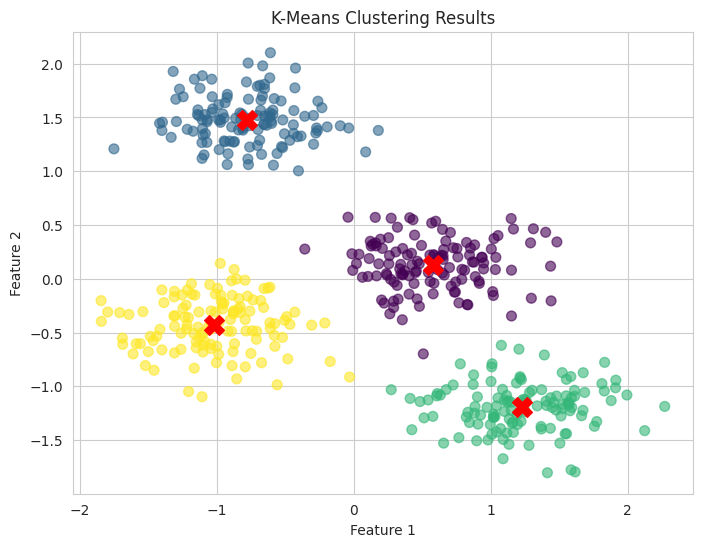

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_assignments, s=50, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', s=200, marker='X')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [9]:
from sklearn.metrics import adjusted_rand_score

ari_score = adjusted_rand_score(y_true, cluster_assignments)
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")


Adjusted Rand Index (ARI): 0.9947
